<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #10: nube de palabras 

Guillermo Andres Cardona
cod:616202023

import numpy as np
import pandas as pd
import re 

from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words("english")

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display



In [79]:
data = pd.read_csv("C:/Users/Memo/Desktop/dataset/news/Corona_NLP_train.csv")
data.sample(10)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
35065,38864,83816,"Salt Lake City, UT (But left my heart in San F...",08-04-2020,Interesting. #ToiletPaper is not necessarily b...,Positive
39326,43125,88077,NaN,12-04-2020,@JJKALE2 @CannabisFairy69 @BreakfastNews @M_Mc...,Positive
23017,26816,71768,New York,25-03-2020,We urgently need the following supplies: Face ...,Extremely Positive
23516,27315,72267,NaN,26-03-2020,Hoarding causes more frequent trips to a vast ...,Negative
11511,15310,60262,London,20-03-2020,Awful to hear a #nurse in tears of exhaustion ...,Extremely Negative
16538,20337,65289,NaN,22-03-2020,@mgeist @kinsellawarren @Rogers Seriously @Rog...,Negative
12506,16305,61257,"Kalispell, MT",21-03-2020,Tonight's @FlatheadBeacon COVID-19 podcast is ...,Positive
24483,28282,73234,"Pennsylvania, USA",26-03-2020,$sny keeps going up in price but options price...,Neutral
27034,30833,75785,India,02-04-2020,"The outlook for domestic steel prices, which h...",Neutral
37461,41260,86212,Saligramam,10-04-2020,#Letsbesafe and save the lives of our dear one...,Extremely Positive


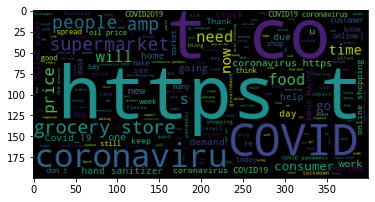

In [80]:
palabras = data.OriginalTweet.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()



In [81]:
stopwords.extend(["https", "co", "COVID"])

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

data['procesado'] = data.OriginalTweet.apply(lambda texto: pre_procesado(texto))

data.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,procesado
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie phil gahan chrisitv ifz fan pa xx ghg...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empty please panic enough food ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket covid outbreak paranoid f...


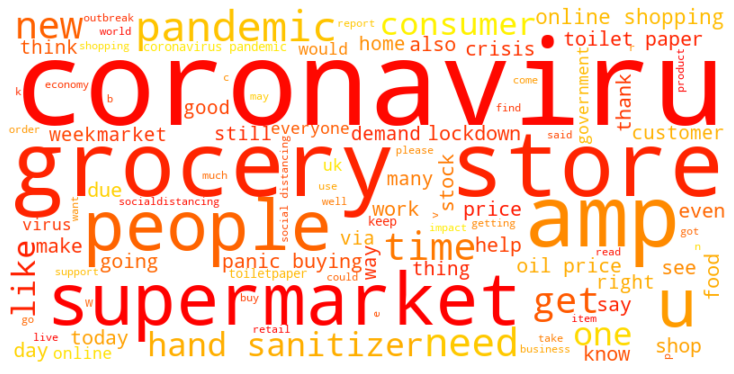

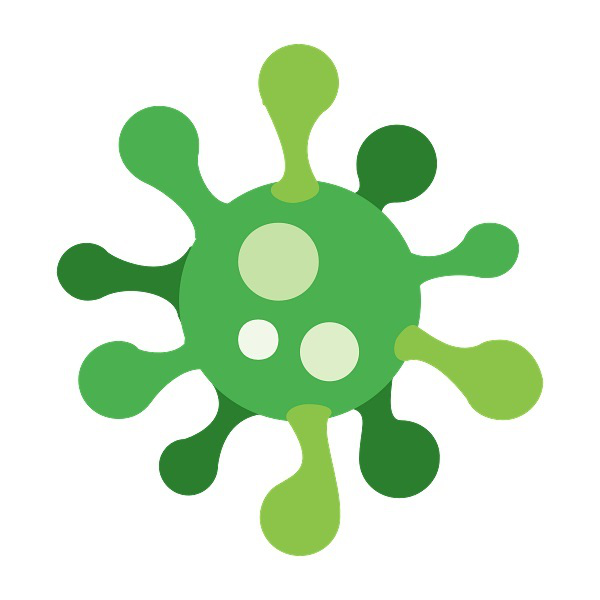

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [82]:
palabras = data.procesado.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="autumn",
                      stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


# CARGAR IMAGEN 
img = PIL.Image.open("C:/Users/Memo/Desktop/dataset/news/coronavirus_png.jpg")
display(img)
  
mask = np.array(img)
mask


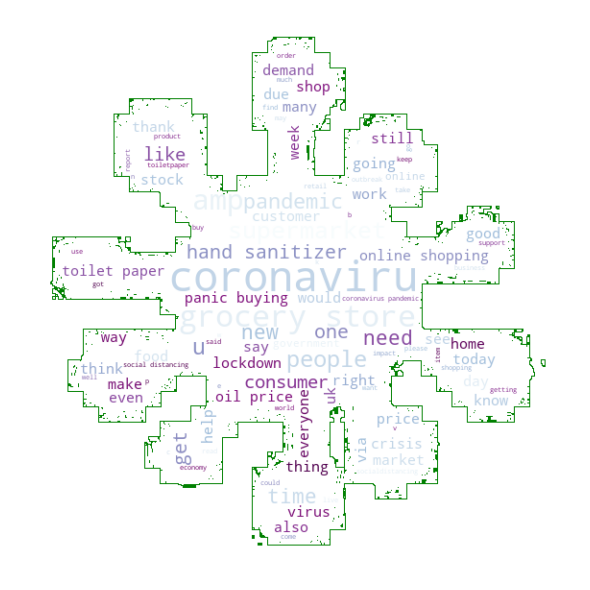

In [83]:
palabras = data.procesado.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="BuPu",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=1, contour_color='green').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

wordcloud.to_file("nlp_flor.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [84]:
def imagClImage(anchoim, altoimg, imagenform, maxpal, bgrimg, colormp, maskara, contorno, contcolor, dicpalabras):
    palabras = data.procesado.str.cat(sep=" ")
    wordcloud = WordCloud(width=anchoim, height=altoimg,
                  max_font_size=150, max_words=maxpal,
                  background_color=bgrimg, colormap=colormp,
                  stopwords=stopwords, collocations=True,
                  mask=maskara, contour_width=contorno, contour_color=contcolor).generate(dicpalabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
    image_colors=ImageColorGenerator(mask)
    wordcloud.to_file(imagenform)

    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()



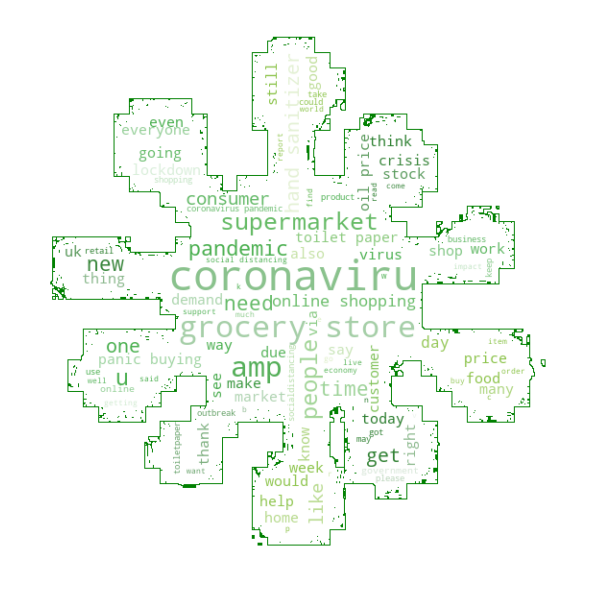

In [85]:
imagClImage(800, 400, "nlp_flor.png", 100, "white", "spring", mask, 1, "green", palabras)

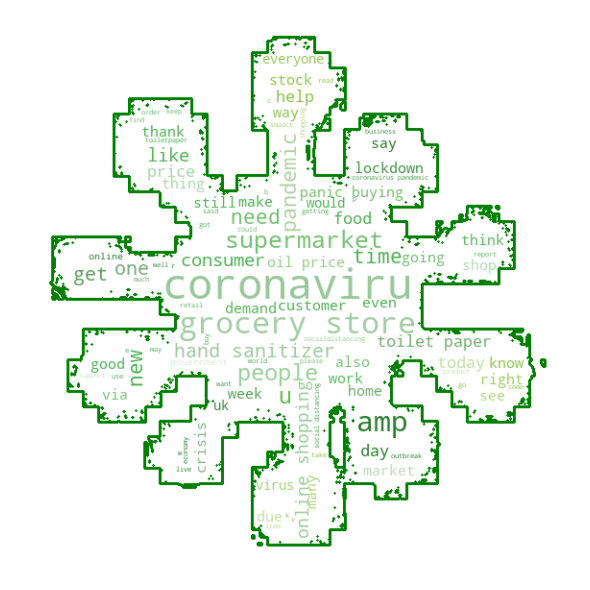

In [86]:
imagClImage(600, 300, "nlp_flor.png", 100, "white", "autumn", mask, 2, "green", palabras)